In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arquivo = "C:/Users/Nadson/OneDrive/Documents/Programacao/Python/arquivos_data/spotify-2023.csv"
df = pd.read_csv(arquivo, encoding='latin1') # encoding='latin1', on_bad_lines='skip' - para outro encoding

### Tratamento de inconsistências

In [3]:
df['streams'] = df['streams'].str.replace(r'[^0-9]', '', regex=True) # busca por qualquer caractere que não seja um dígito numérico (0-9)
df.sort_values('streams', ascending=False, inplace=True)
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '.')
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '.')

### Ajuste do tipo das variáveis
* Algumas colunas estão como "object", maneira que o panda guarda strings
* É necessário separar os tipos de dados das colunas


In [4]:
numerical_cols = ['artist_count', 'released_year', 'released_month', 'released_day', 
                  'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
                   'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 
                   'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                    'liveness_%', 'speechiness_%']
categorical_cols = ['track_name', 'artist(s)_name', 'key', 'mode']

def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)

to_type(df, numerical_cols, 'float')
to_type(df, categorical_cols, 'category')

### Outliers
* Valores que desequilibram o DataFrame
* É possível detectar através de métodos estatísticos

In [5]:
def exclui_outliers(DataFrame, col_name):
    intervalo = 2.7*DataFrame[col_name].std()
    media = DataFrame[col_name].mean()
    DataFrame.loc[df[col_name] < (media-intervalo), col_name] = np.nan
    DataFrame.loc[df[col_name] > (media+intervalo), col_name] = np.nan

numerical_cols = ['artist_count', 'released_year', 'released_month', 'released_day', 
                  'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
                   'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 
                   'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                    'liveness_%', 'speechiness_%']

for col in numerical_cols:
    exclui_outliers(df, col)

### Dados faltantes
* É necessário remover/substituir por outros valores.
* É possível substituir pela moda ou mediana.

In [6]:
for column in ['acousticness_%', 'liveness_%', 'speechiness_%']:
    df[column].fillna(df[column].mode(), inplace=True)

for column in ['danceability_%', 'energy_%', 'valence_%', 'instrumentalness_%']:
    df[column].fillna(df[column].mean(), inplace=True)

### Análise 1:
* As 15 músicas com maior quantidade de streams

In [7]:
duplicated_artists = df[df.duplicated('artist(s)_name', False)].head(15)
display(duplicated_artists[['artist(s)_name', 'track_name', 'released_year', 'streams']])

,artist(s)_name,track_name,released_year,streams
33,Taylor Swift,Anti-Hero,2022.0,999748277.0
253,Joji,Glimpse of Us,2022.0,988515741.0
455,SZA,Seek & Destroy,2022.0,98709329.0
98,Lana Del Rey,Summertime Sadness,2011.0,983637508.0
130,(G)I-DLE,Queencard,2023.0,96273746.0
952,Burna Boy,Alone,2022.0,96007391.0
339,Morgan Wallen,Everything I Love,2023.0,95623148.0
151,Peso Pluma,Bye,2023.0,95053634.0
243,Sia,Unstoppable,2016.0,939844851.0
945,Drake,BackOutsideBoyz,2022.0,93367537.0


### Análise 2:
* Os 15 artistas mais repetidos

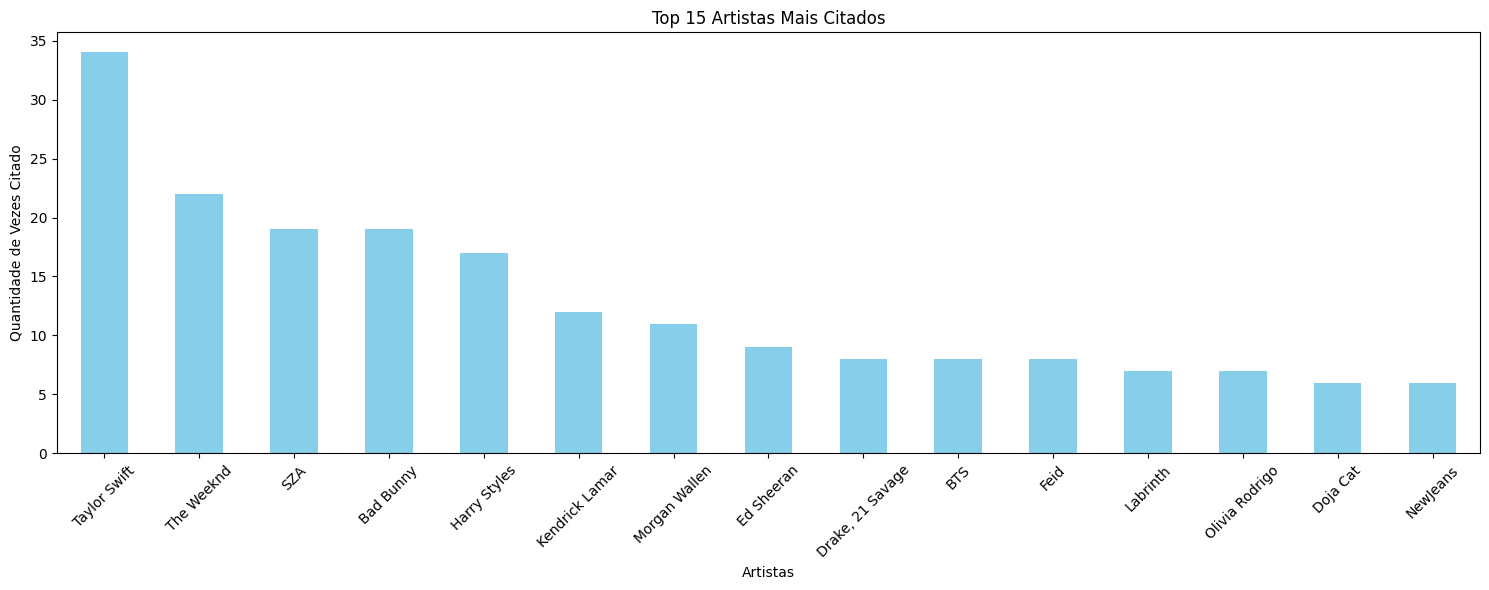

In [8]:
artist_count = df['artist(s)_name'].value_counts()
top_15_artists = artist_count.head(15)

plt.figure(figsize=(15, 6))
top_15_artists.plot(kind='bar', color='skyblue')
plt.title('Top 15 Artistas Mais Citados')
plt.xlabel('Artistas')
plt.ylabel('Quantidade de Vezes Citado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análise 3:
* Os 15 artistas com maior soma de streams

In [9]:
soma_streams = df.groupby('artist(s)_name')['streams'].sum().reset_index()
top_15_artists = soma_streams.nlargest(15, 'streams')
display(top_15_artists)

C:\Users\Nadson\AppData\Local\Temp\ipykernel_9768\871096347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  soma_streams = df.groupby('artist(s)_name')['streams'].sum().reset_index()


,artist(s)_name,streams
572,The Weeknd,1.418555e+10
558,Taylor Swift,1.405366e+10
159,Ed Sheeran,1.390895e+10
223,Harry Styles,1.160865e+10
43,Bad Bunny,9.997800e+09
431,Olivia Rodrigo,7.442149e+09
171,Eminem,6.183806e+09
75,Bruno Mars,5.846921e+09
25,Arctic Monkeys,5.569807e+09
229,Imagine Dragons,5.272485e+09


### Extração de recursos 1
* Características das 15 músicas mais ouvidas
* Uso da mediana para descobrir medidas aproximadas

In [10]:
duplicated_artists = df[df.duplicated('artist(s)_name', False)].head(15)
display(duplicated_artists[['track_name', 'released_year', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'key', 'mode']])

for column in ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']:
    print(f'{column}: {round(df[column].head(15).median())}')

,track_name,released_year,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key,mode
33,Anti-Hero,2022.0,97.0,64.0,51.0,63.0,12.0,0.0,19.0,5.0,E,Major
253,Glimpse of Us,2022.0,170.0,44.0,27.0,32.0,89.0,0.0,14.0,5.0,G#,Major
455,Seek & Destroy,2022.0,152.0,65.0,35.0,65.0,44.0,18.0,21.0,7.0,C#,Major
98,Summertime Sadness,2011.0,112.0,56.0,24.0,66.0,7.0,0.0,12.0,3.0,C#,Minor
130,Queencard,2023.0,130.0,82.0,69.0,83.0,3.0,0.0,27.0,5.0,E,Minor
952,Alone,2022.0,90.0,61.0,32.0,67.0,15.0,0.0,11.0,5.0,E,Minor
339,Everything I Love,2023.0,104.0,56.0,72.0,85.0,0.0,0.0,15.0,3.0,G#,Major
151,Bye,2023.0,122.0,78.0,70.0,81.0,57.0,0.0,10.0,5.0,NaN,Major
243,Unstoppable,2016.0,174.0,47.0,27.0,78.0,11.0,0.0,10.0,8.0,A,Major
945,BackOutsideBoyz,2022.0,142.0,85.0,40.0,43.0,4.0,0.0,39.0,32.0,F,Minor


bpm: 112
danceability_%: 61
valence_%: 35
energy_%: 64
acousticness_%: 15
instrumentalness_%: 0
liveness_%: 17
speechiness_%: 5


### Extração de recursos 2
* As músicas dos 15 artistas mais presentes do DataFrame e suas respectivas características


In [22]:
artist_count = df['artist(s)_name'].value_counts()
top_15_artists = artist_count.head(15).index.tolist()

colunas = ['artist(s)_name', 'track_name', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']
artista_especifico = top_15_artists[1]

musicas_artista_especifico = df[df['artist(s)_name'] == artista_especifico][colunas]
display(musicas_artista_especifico)

,artist(s)_name,track_name,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
523,The Weeknd,Starry Eyes,7.460146e+07,86.0,28.000000,13.0,41.0,50.0,0.000000,19.0,3.0
371,The Weeknd,After Hours,6.980861e+08,109.0,66.000000,16.0,57.0,10.0,1.000000,12.0,3.0
175,The Weeknd,Reminder,6.846758e+08,160.0,71.000000,40.0,50.0,16.0,0.000000,16.0,22.0
538,The Weeknd,Donï¿½ï¿½ï¿½t Break My,6.380353e+07,122.0,77.000000,25.0,62.0,34.0,0.000000,23.0,3.0
521,The Weeknd,Dawn FM,5.393353e+07,78.0,67.147524,10.0,49.0,62.0,0.000000,49.0,5.0
616,The Weeknd,Take My Breath,4.327023e+08,121.0,75.000000,53.0,74.0,2.0,0.000000,11.0,5.0
541,The Weeknd,A Tale By Quincy,4.192447e+07,94.0,46.000000,55.0,50.0,71.0,0.000000,10.0,11.0
502,The Weeknd,Is There Someone Else?,3.912514e+08,135.0,70.000000,60.0,58.0,4.0,0.000000,16.0,3.0
552,The Weeknd,Every Angel is Terrifying,3.730797e+07,118.0,44.000000,52.0,94.0,11.0,0.000000,4.0,29.0
55,The Weeknd,Blinding Lights,3.703895e+09,171.0,50.000000,38.0,80.0,0.0,0.000000,9.0,7.0


### Extração de recursos 3
* Transformar as características das músicas em vetor para uso posterior de aprendizado de máquina
